<center><h2>ATTENTION! Avant de démarrer, merci de suivre la procédure en 4 étapes ci-dessous pour le bon fonctionnement de la page</h2></center>
<b style="color:red;">1°) Cliquez sur le bouton "Sans Confiance"</b> 
<center><img src="./trust.png"></center>
<p>
<br></p>
<b style="color:red;">2°) Cliquer sur le bouton rouge "Faire Confiance" pour autoriser l'exécution des scripts de la page</b>
<center><img src="./trust2.png"></center>
<p>
<br></p>
<b style="color:red;">3°) Cliquez sur l'icone "redémarrer le noyau et ré-exécuter tout le notebook"</b>
<center><img src="./trust3.png"></center>
<p>
<br></p>
<b style="color:red;">4°) Cliquez sur le bouton rouge "Relancer et exécuter toutes les cellules" pour exécuter tous les programmes pythons déjà présents sur la page</b>
<center><img src="./trust4.png"></center>

<div id="Titre"></div>

# Fiche Méthode - Modéliser une série de données

## Sommaire
<ol><li><a href="#Importer CSV">Importer un fichier CSV</a></li>
    <li><a href="#Ecrire fonction">Ecrire une fonction</a></li>
    <li><a href="#Modeliser">Modéliser</a></li>
    <li><a href="#Tracer">Tracer le modèle</a></li>
    <li><a href="#Exemple">Exemple complet</a></li></ol>

<h2><center>Vous pouvez modifier et exécuter chacun des codes de la page pour comprendre ce que fait chaque ligne et option</center></h2>

<p><br><b>Installation automatique des bibliothèques (normalement cela est déjà fait)</b></p>

In [1]:
!pip install matplotlib
!pip install scipy

<p><br><b>Autoriser l'interaction avec les graphiques (facultatif)</b></p>

In [2]:
%matplotlib notebook

<b>Importer</b> (charger en mémoire) la bibliothèque <b>matplotlib.pyplot</b> sous le nom <b>plt</b>, la fonction <b>curve_fit</b> qui va nous ajuster le modèle ainsi que les fonctions et valeurs nécessaires.

In [3]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import cos, sin, pi

<div id="Importer CSV"></div>

## Importer un fichier CSV <a href="#Titre">(Sommaire)</a>

<b>Il est possible d'aller chercher le document dans votre arborescence, puis de mettre les données en mémoire avec le programme suivant.</b>

```python
#Importer les bibliothèques nécessaires
from tkinter import Tk
from tkinter.filedialog import askopenfilename

#Choisir le fichier dans une fenêtre graphique
fen = Tk() 
name = askopenfilename(filetypes =(("Fichier CSV", "*.csv"),("Fichier Texte","*.txt"),("Tous les fichiers","*.*")),title = "Choisir un fichier")
fen.destroy()

#Lire les données du fichier et les stocker dans une liste
f = open(name,"r")
data=f.readlines()
f.close()

#Mise en forme des données
data = data[3:] # on supprime 3 lignes d'en-tête.
sep=";" # caractère séparateur du csv. Il peut être ',', ';' ou '\t' 
for i in range(len(data)):
    data[i] = data[i].replace(",",".") # changer le caractère utilisé pour la virgule décimale
    data[i] = data[i].strip() # supprimer les caractères de changement de ligne
    data[i] = data[i].split(sep) # séparer les colonnes
    data[i] = list(map(float,data[i]))  # passer les données du type str au type float
```

<b>On peut aussi donner directement le chemin d'accès comme ci-dessous mais  le chemin d'accès sera à écrire différemment en fonction de la machine utilisée.</b> <p>Vous pouvez télécharger <a href="./parabole.csv">ici le fichier parabole.csv</a>.</p>

In [4]:
f = open("./parabole.csv","r")
data=f.readlines()
f.close()

data = data[3:]
sep=";"
for i in range(len(data)):
    data[i] = data[i].replace(",",".")
    data[i] = data[i].strip()
    data[i] = data[i].split(sep)
    data[i] = list(map(float,data[i]))

On peut ensuite construire les listes de données. Ici le fichier parabole.csv contient trois colonnes, la première pour le temps, la seconde pour les valeurs de x et la troisième pour les valeurs de y. On va donc construire ces trois listes avec:

In [5]:
t = []
x = []
y = []
for ligne in data:
    t.append(ligne[0])
    x.append(ligne[1])
    y.append(ligne[2])

<div id="Ecrire fonction"></div>

## Ecrire une fonction  <a href="#Titre">(Sommaire)</a>

Pour définir une fonction, on utilise les mots clés <b>def</b> et <b>return</b>. On indique entre parenthèses les différents arguments nécessaire au calcul de cette fonction.

In [6]:
def aire_rectangle(long,larg):
    return long * larg

def perimetre_carre(cote):
    p = 4 * cote
    return p

On utilise ces fonctions en appelant leur nom et en indiquant les valeurs des arguments.

In [7]:
aire_rectangle(3,4)

12

In [8]:
perimetre_carre(5)

20

Pour modéliser une série de données, il faut écrire une fonction qui comporte <b>une variable puis tous les paramètres à optimiser.</b> Par exemple:

In [9]:
def lineaire(x, a):
    return a * x

def affine(x, a, b):
    return a * x + b

def parabole(x, a, b, c):
    return a * x**2 + b * x + c

def cos400Hz(x, a, b):
    return a * cos(2*pi*400*x + b)

Le premier argument (ici x) sera remplacé par les valeurs de la série de donnée correspondant aux abscisses et les paramètres a, b , c, etc... suivants seront optimisés pour que la sortie de la fonction corresponde aux valeurs de la série de donnée correspondant aux ordonnées.

<div id="Modeliser"></div>

## Modéliser <a href="#Titre">(Sommaire)</a>

Il faut disposer d'<b>une série de données pour les abscisses</b> (sous forme d'une liste), d'<b>une série de données pour les ordonnées</b> (sous forme d'une liste de même taille) et d'<b>une fonction à optimiser</b>. Les listes peuvent être tapées directement à la main ou <a href="#Importer CSV">chargées à partir d'un fichier csv</a>. On utilise alors la fonction <b>curve_fit</b> chargée en mémoire précédemment. 
<p>Ainsi pour modéliser l'équation de la trajectoire d'une balle soumise uniquement à son poids on peut écrire:</p>

In [10]:
parametre, covariance = curve_fit(parabole,x,y)

La liste <b>parametre</b> contient maintenant les paramètres optimisés a, b, c etc... dont le nombre dépend de la fonction utilisée. Nous n'utiliserons pas données contenues dans la variable covariance.

In [11]:
print("L'équation de la trajectoire est Y = {:+.2E} X\u00B2 {:+.2E} X {:+.2E}".format(*parametre))

L'équation de la trajectoire est Y = -1.60E+00 X² +2.38E+00 X +1.15E-03


<div id="Tracer"></div>

## Tracer le modèle <a href="#Titre">(Sommaire)</a>

<b>Construire les listes de points du modèle</b>
<p>Si on veut tracer le modèle, il faut construire une liste de points utilisant ce modèle.</p>

In [12]:
modele = []
for val in x:
    modele.append(parabole(val,*parametre))

Si l'on veut que le modèle dépasse des points expérimentaux, ou que la courbe soit plus lisse, il faut construire une liste d'abscisses spécifique au modèle.

In [13]:
xmodele = []
ymodele = []
for i in range(1000):
    xmodele.append(1.50*i/1000)
    ymodele.append(parabole(xmodele[i],*parametre))

<p><br><b>Tracer les points expérimentaux et le modèle sur un même graphique</b></p>

<IPython.core.display.Javascript object>


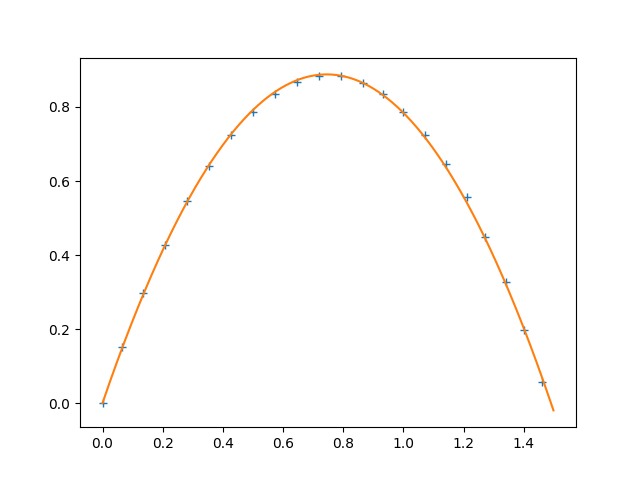

In [14]:
plt.figure("Tracer les points expérimentaux et le modèle")
plt.plot(x,y,"+")
plt.plot(xmodele,ymodele)
plt.show()

Et avec quelques options supplémentaires pour améliorer le graphique:

<IPython.core.display.Javascript object>


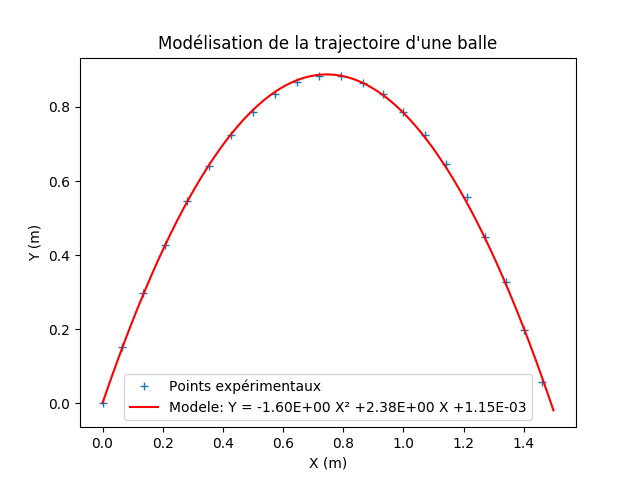

In [15]:
plt.figure("Tracer les points expérimentaux et le modèle2")
plt.plot(x,y,marker="+",linestyle=" ",label="Points expérimentaux")
plt.plot(xmodele,ymodele,color="red",label="Modele: Y = {:+.2E} X\u00B2 {:+.2E} X {:+.2E}".format(*parametre))
plt.title("Modélisation de la trajectoire d'une balle")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.legend()
plt.show()

<div id="Exemple"></div>

## Exemple complet <a href="#Titre">(Sommaire)</a>

<b>Modélisation de la loi de la réfraction</b>

<IPython.core.display.Javascript object>


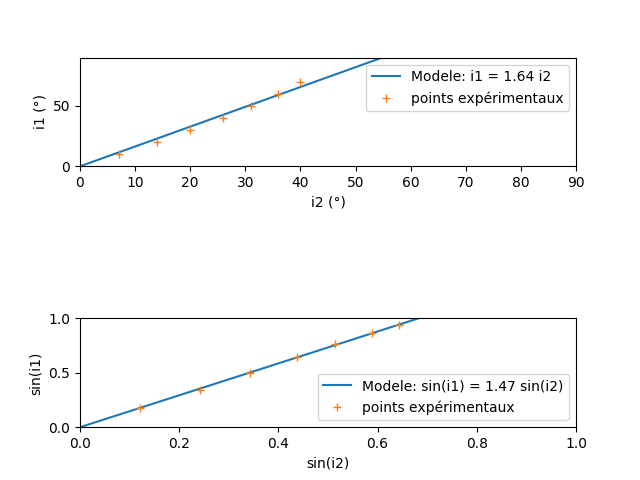

In [16]:
#Données expérimentales
i1 = [0, 10, 20, 30, 40, 50, 60, 70]
i2 = [0, 7, 14, 20, 26, 31, 36, 40]

sini1 = [sin(i*pi/180) for i in i1]
sini2 = [sin(i*pi/180) for i in i2]

#Modélisation
def lineaire(x, a):
    return a * x
parametre1, covariance = curve_fit(lineaire,i2,i1)
parametre2, covariance = curve_fit(lineaire,sini2,sini1)

#Construction des listes des modèles
xmodele1 = [10*i for i in range(10)]
ymodele1 = [lineaire(val,*parametre1) for val in xmodele1]

xmodele2 = [sin(10*i*pi/180) for i in range(10)]
ymodele2 = [lineaire(val,*parametre2) for val in xmodele2]

#Construction de la figure
plt.figure("Comparaison de deux modèles pour une expérience de réfraction")
plt.subplot2grid((3,1),(0,0))
plt.plot(xmodele1,ymodele1,label="Modele: i1 = {:.2f} i2".format(*parametre1))
plt.plot(i2,i1,marker="+",linestyle=" ",label="points expérimentaux")
plt.xlabel("i2 (°)")
plt.ylabel("i1 (°)")
plt.xlim([0,90])
plt.ylim([0,90])
plt.legend()

plt.subplot2grid((3,1),(2,0))
plt.plot(xmodele2,ymodele2,label="Modele: sin(i1) = {:.2f} sin(i2)".format(*parametre2))
plt.plot(sini2,sini1,marker="+",linestyle=" ",label="points expérimentaux")
plt.xlabel("sin(i2)")
plt.ylabel("sin(i1)")
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()

plt.show()


<h2>RETOUR : <a href="#Titre">(Sommaire)</a></h2>
<h2>SUITE : <a href="./methode vecteurs.ipynb">(Fiche Méthode - Tracer des vecteurs)</a></span></h2>